<a href="https://colab.research.google.com/github/chandini2595/FireSense/blob/main/Colab_Files/With_Latent_DS1_DS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/combined (2).csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())

# Show the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10988 entries, 0 to 10987
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         10988 non-null  object 
 1   county       10988 non-null  object 
 2   maxtempF     10988 non-null  float64
 3   mintempF     10988 non-null  float64
 4   avgtempF     10988 non-null  float64
 5   totalSnow    10988 non-null  float64
 6   humid        10988 non-null  float64
 7   wind         10988 non-null  float64
 8   precip       10988 non-null  float64
 9   q_avgtempF   10988 non-null  float64
 10  q_avghumid   10988 non-null  float64
 11  q_sumprecip  10988 non-null  float64
 12  sunHour      10988 non-null  float64
 13  FIRE_NAME    10988 non-null  object 
 14  CAUSE        10988 non-null  float64
 15  lat          10988 non-null  float64
 16  long         10988 non-null  float64
 17  GIS_ACRES    10988 non-null  float64
dtypes: float64(15), object(3)
memory

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting only numerical columns for PCA
numerical_cols = df.select_dtypes(include=['float64']).columns
X = df[numerical_cols]

# Standardizing the data (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

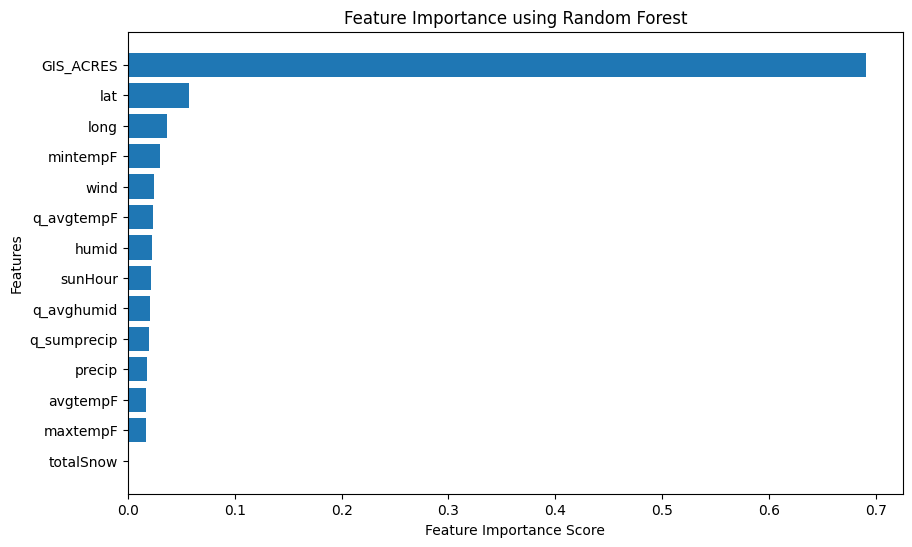

        Feature  Importance
13    GIS_ACRES    0.690467
11          lat    0.057727
12         long    0.036373
1      mintempF    0.029929
5          wind    0.024377
7    q_avgtempF    0.023281
4         humid    0.022680
10      sunHour    0.021402
8    q_avghumid    0.021085
9   q_sumprecip    0.019648


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define features (excluding categorical and target variables)
feature_cols = [col for col in df.columns if col not in ['date', 'county', 'FIRE_NAME', 'CAUSE']]
X = df[feature_cols]
y = df['CAUSE']  # Target variable (fire cause)

# Train a Random Forest model to assess feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances = pd.DataFrame({'Feature': feature_cols, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.gca().invert_yaxis()
plt.show()

# Print top features
print(feature_importances.head(10))

In [ ]:
# Selecting important features based on Random Forest ranking
important_features = feature_importances[feature_importances['Importance'] > 0.029]['Feature'].tolist()
df_selected = df[important_features + ['CAUSE']]  # Keeping target variable

# Display updated dataset with selected features
print("Selected Features for Modeling:", important_features)
print("\nUpdated Dataset Shape:", df_selected.shape)

Selected Features for Modeling: ['GIS_ACRES', 'lat', 'long', 'mintempF']

Updated Dataset Shape: (10988, 5)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_selected.drop(columns=['CAUSE'])
y = df_selected['CAUSE']

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split sizes
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")

print(df_selected.head())

Training Data Shape: (8790, 4), Testing Data Shape: (2198, 4)
    GIS_ACRES    lat    long   mintempF  CAUSE
0    0.000000  34.54 -120.04  59.709677    0.0
1  176.763400  38.18 -120.56  51.290323    1.0
2   73.444778  38.18 -120.56  51.290323   10.0
3  101.074150  38.18 -120.56  51.290323   14.0
4  103.968050  38.18 -120.56  51.290323    6.0


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 84116.9609 - mae: 18.9937 - val_loss: 105.8248 - val_mae: 2.9384
Epoch 2/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 226163.8750 - mae: 16.0034 - val_loss: 19.3085 - val_mae: 2.2927
Epoch 3/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 31.8168 - mae: 2.5755 - val_loss: 112.2901 - val_mae: 2.7740
Epoch 4/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55.9403 - mae: 2.6097 - val_loss: 15.5522 - val_mae: 2.4396
Epoch 5/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 15.5407 - mae: 2.3557 - val_loss: 14.5520 - val_mae: 2.1045
Epoch 6/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 22.8960 - mae: 2.3541 - val_loss: 13.7674 - val_mae: 2.0950
Epoch 7/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 33.3026 - mae: 2.4067 - val_loss: 13.1728 - val_mae: 2.1524
Epoch 8/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 135.9751 - mae: 2.4894 - val_loss: 1745.1287 - val_mae: 6.0993
Epoch 9/20
275/275 ━━━━━━━━━━━━━━━━━━

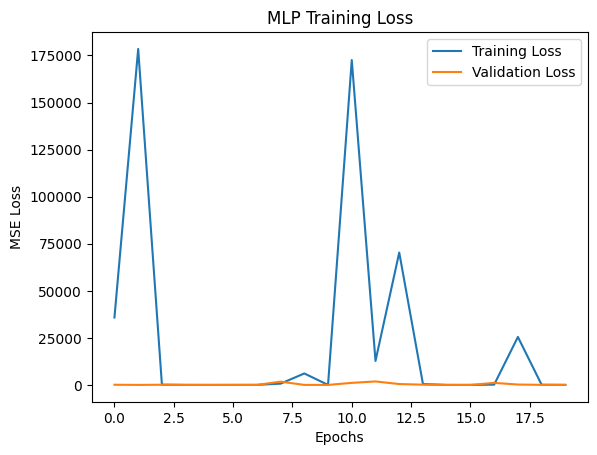

Linear Regression - MSE: 21.83, R² Score: 0.10
Random Forest - MSE: 7.95, R² Score: 0.67
KNN Regressor - MSE: 11.60, R² Score: 0.52
XGBoost - MSE: 7.30, R² Score: 0.70


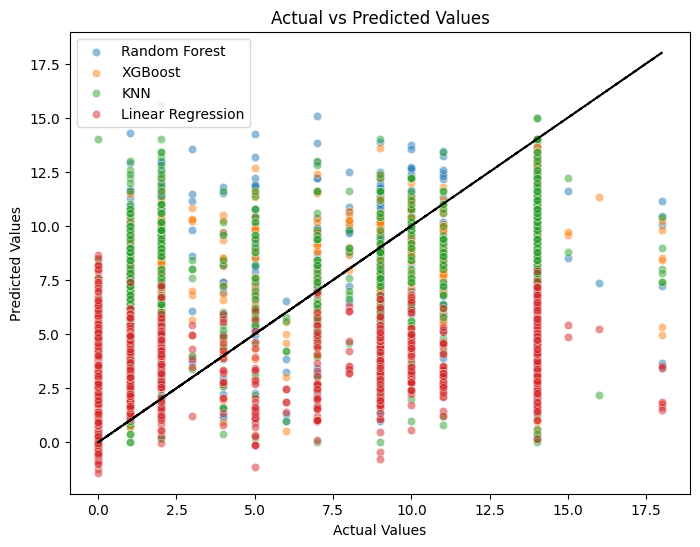

               Model        MSE  R² Score
0  Linear Regression  21.827717  0.100743
1      Random Forest   7.948273  0.672548
2                KNN  11.601419  0.522046
3            XGBoost   7.303674  0.699104


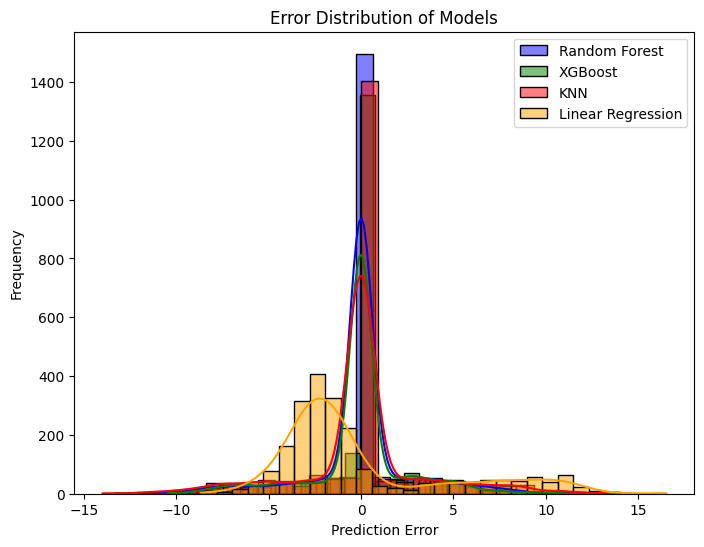

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define MLP model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("MLP Training Loss")
plt.show()


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R² Score: {r2_lr:.2f}")

from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R² Score: {r2_rf:.2f}")



from sklearn.neighbors import KNeighborsRegressor

# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor - MSE: {mse_knn:.2f}, R² Score: {r2_knn:.2f}")



from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.2f}, R² Score: {r2_xgb:.2f}")


import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
results = pd.DataFrame({
    "Actual": y_test,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "KNN": y_pred_knn,
    "Linear Regression": y_pred_lr
})

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results["Actual"], y=results["Random Forest"], label="Random Forest", alpha=0.5)
sns.scatterplot(x=results["Actual"], y=results["XGBoost"], label="XGBoost", alpha=0.5)
sns.scatterplot(x=results["Actual"], y=results["KNN"], label="KNN", alpha=0.5)
sns.scatterplot(x=results["Actual"], y=results["Linear Regression"], label="Linear Regression", alpha=0.5)
plt.plot(results["Actual"], results["Actual"], color='black', linestyle='dashed')  # Perfect predictions line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


import pandas as pd

# Store results in a DataFrame
model_results_with_latent = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "KNN", "XGBoost"],
    "MSE": [mse_lr, mse_rf, mse_knn, mse_xgb],
    "R² Score": [r2_lr, r2_rf, r2_knn, r2_xgb]
})

# Display the table
print(model_results_with_latent)



# Calculate errors
errors_rf = y_test - y_pred_rf
errors_xgb = y_test - y_pred_xgb
errors_knn = y_test - y_pred_knn
errors_lr = y_test - y_pred_lr

# Plot error distribution
plt.figure(figsize=(8, 6))
sns.histplot(errors_rf, bins=30, label="Random Forest", kde=True, color="blue")
sns.histplot(errors_xgb, bins=30, label="XGBoost", kde=True, color="green")
sns.histplot(errors_knn, bins=30, label="KNN", kde=True, color="red")
sns.histplot(errors_lr, bins=30, label="Linear Regression", kde=True, color="orange")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution of Models")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display

# Create a DataFrame with model evaluation results
model_results_without_latent_upd = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "KNN", "XGBoost"],
    "MSE": [mse_lr, mse_rf, mse_knn, mse_xgb],
    "R² Score": [r2_lr, r2_rf, r2_knn, r2_xgb]
})

# Display the DataFrame
display(model_results_without_latent_upd)

,Model,MSE,R² Score
0,Linear Regression,21.827717,0.100743
1,Random Forest,7.948273,0.672548
2,KNN,11.601419,0.522046
3,XGBoost,7.303674,0.699104


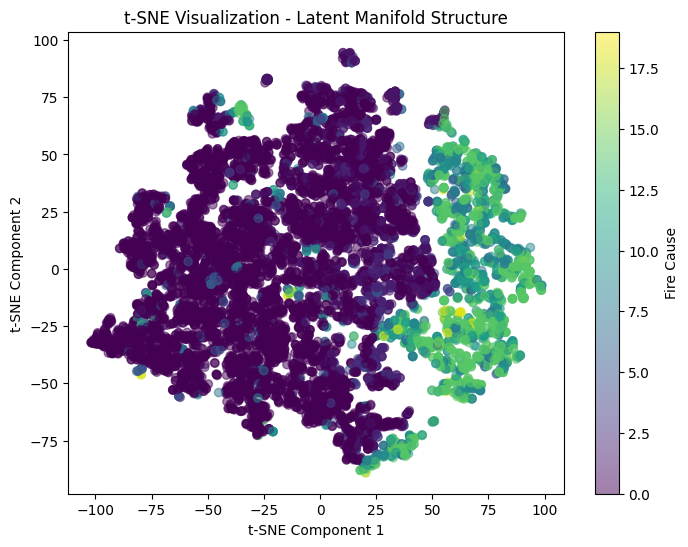

In [ ]:
from sklearn.manifold import TSNE

# Applying t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Scatter plot of t-SNE transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, c=df['CAUSE'], cmap='viridis')
plt.colorbar(label='Fire Cause')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization - Latent Manifold Structure")
plt.show()

In [ ]:
# Adding t-SNE features to the original dataset
df['tsne_1'] = X_tsne[:, 0]
df['tsne_2'] = X_tsne[:, 1]

# Display updated dataset with t-SNE features
print(df[['tsne_1', 'tsne_2']].head())

      tsne_1     tsne_2
0  28.347691   0.327810
1  20.500996  65.554420
2  82.152344  34.870190
3  81.157898  34.380566
4  82.597061  35.054005


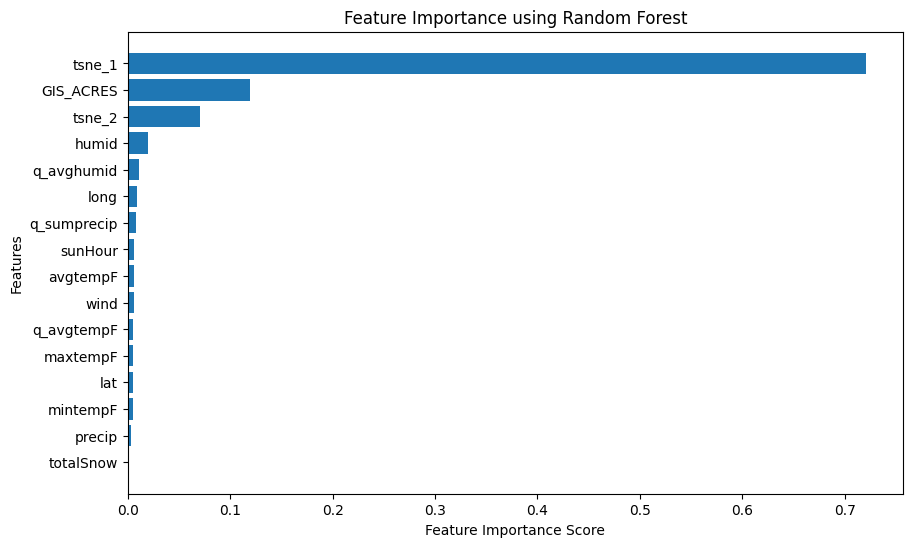

        Feature  Importance
14       tsne_1    0.720584
13    GIS_ACRES    0.119006
15       tsne_2    0.070185
4         humid    0.020115
8    q_avghumid    0.010765
12         long    0.009480
9   q_sumprecip    0.007650
10      sunHour    0.006122
2      avgtempF    0.006091
5          wind    0.005739


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define features (excluding categorical and target variables)
feature_cols = [col for col in df.columns if col not in ['date', 'county', 'FIRE_NAME', 'CAUSE']]
X = df[feature_cols]
y = df['CAUSE']  # Target variable (fire cause)

# Train a Random Forest model to assess feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances_upd = pd.DataFrame({'Feature': feature_cols, 'Importance': rf_model.feature_importances_})
feature_importances_upd = feature_importances_upd.sort_values(by='Importance', ascending=False)

# Display feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_upd['Feature'], feature_importances_upd['Importance'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.gca().invert_yaxis()
plt.show()

# Print top features
print(feature_importances_upd.head(10))

In [ ]:
# Selecting important features based on Random Forest ranking
important_features_latent = feature_importances_upd[feature_importances_upd['Importance'] > 0.010]['Feature'].tolist()
df_selected_latent = df[important_features_latent + ['CAUSE']]  # Keeping target variable

# Display updated dataset with selected features
print("Selected Features for Modeling:", important_features_latent)
print("\nUpdated Dataset Shape:", df_selected_latent.shape)

Selected Features for Modeling: ['tsne_1', 'GIS_ACRES', 'tsne_2', 'humid', 'q_avghumid']

Updated Dataset Shape: (10988, 6)


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target variable
X = df_selected_latent.drop(columns=['CAUSE'])
y = df_selected_latent['CAUSE']

# Splitting data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm split sizes
print(f"Training Data Shape: {X_train.shape}, Testing Data Shape: {X_test.shape}")

Training Data Shape: (8790, 5), Testing Data Shape: (2198, 5)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 186472.9844 - mae: 26.5166 - val_loss: 101.6227 - val_mae: 2.2847
Epoch 2/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 564.0529 - mae: 3.0446 - val_loss: 6206.9897 - val_mae: 8.2813
Epoch 3/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 126012.6719 - mae: 17.6480 - val_loss: 5060694.0000 - val_mae: 206.1360
Epoch 4/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 643360.6250 - mae: 53.5122 - val_loss: 1218.1411 - val_mae: 4.4757
Epoch 5/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 5701.7412 - mae: 3.7836 - val_loss: 6637.3848 - val_mae: 8.2156
Epoch 6/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6522.0571 - mae: 7.2456 - val_loss: 14.7957 - val_mae: 2.0759
Epoch 7/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 217.6531 - mae: 2.2796 - val_loss: 8263.2656 - val_mae: 9.0622
Epoch 8/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3214.1343 - mae: 5.7761 - val_loss: 26.4952 - val_mae: 2.2053
Epoch 9/20
2

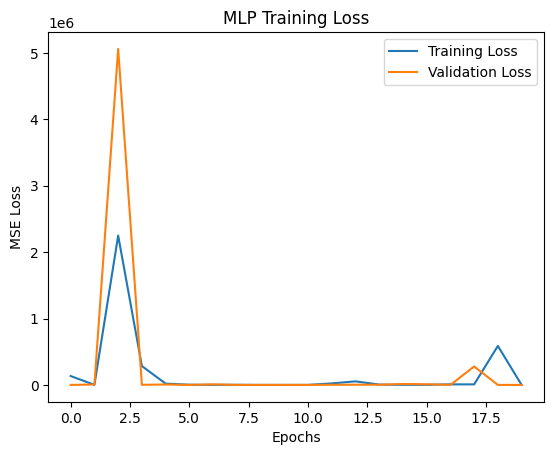

Linear Regression - MSE: 11.14, R² Score: 0.54
Random Forest - MSE: 1.57, R² Score: 0.94
KNN Regressor - MSE: 4.40, R² Score: 0.82
XGBoost - MSE: 1.76, R² Score: 0.93


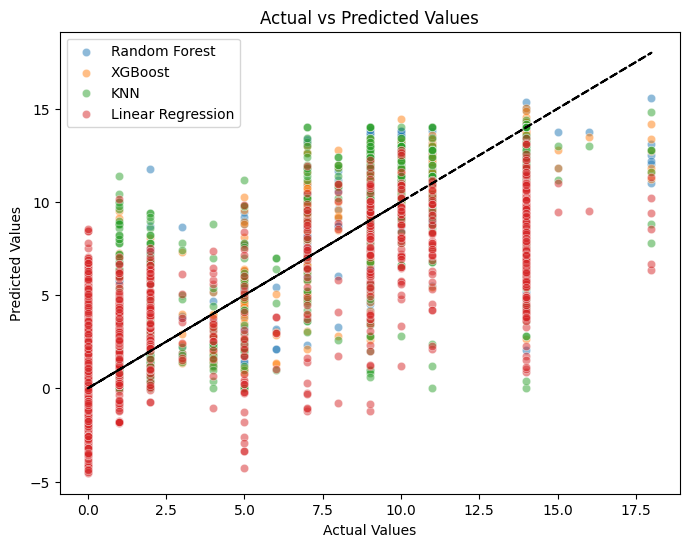

               Model        MSE  R² Score
0  Linear Regression  11.139587  0.541072
1      Random Forest   1.567442  0.935425
2                KNN   4.402675  0.818619
3            XGBoost   1.763644  0.927342


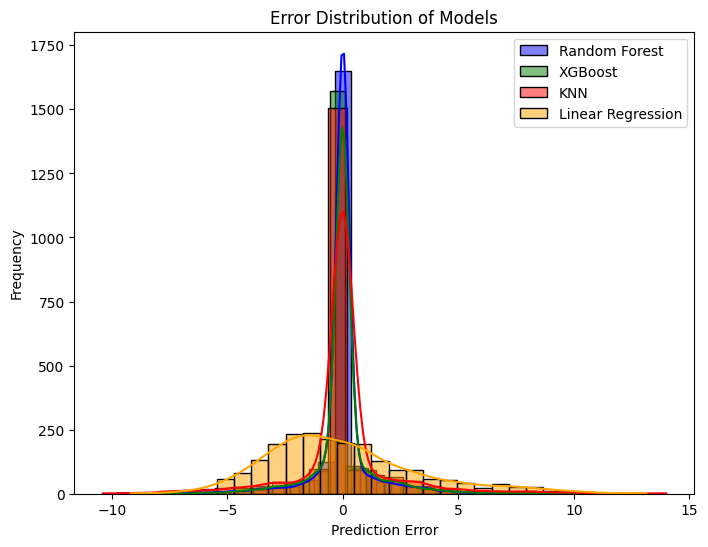

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define MLP model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
mlp_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Plot training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")
plt.legend()
plt.title("MLP Training Loss")
plt.show()


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression - MSE: {mse_lr:.2f}, R² Score: {r2_lr:.2f}")

from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - MSE: {mse_rf:.2f}, R² Score: {r2_rf:.2f}")



from sklearn.neighbors import KNeighborsRegressor

# Train KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict on test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate performance
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor - MSE: {mse_knn:.2f}, R² Score: {r2_knn:.2f}")



from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost - MSE: {mse_xgb:.2f}, R² Score: {r2_xgb:.2f}")


import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for visualization
results = pd.DataFrame({
    "Actual": y_test,
    "Random Forest": y_pred_rf,
    "XGBoost": y_pred_xgb,
    "KNN": y_pred_knn,
    "Linear Regression": y_pred_lr
})

# Plot predictions vs actual values
plt.figure(figsize=(8, 6))
sns.scatterplot(x=results["Actual"], y=results["Random Forest"], label="Random Forest", alpha=0.5)
sns.scatterplot(x=results["Actual"], y=results["XGBoost"], label="XGBoost", alpha=0.5)
sns.scatterplot(x=results["Actual"], y=results["KNN"], label="KNN", alpha=0.5)
sns.scatterplot(x=results["Actual"], y=results["Linear Regression"], label="Linear Regression", alpha=0.5)
plt.plot(results["Actual"], results["Actual"], color='black', linestyle='dashed')  # Perfect predictions line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()


import pandas as pd

# Store results in a DataFrame
model_results_with_latent = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "KNN", "XGBoost"],
    "MSE": [mse_lr, mse_rf, mse_knn, mse_xgb],
    "R² Score": [r2_lr, r2_rf, r2_knn, r2_xgb]
})

# Display the table
print(model_results_with_latent)



# Calculate errors
errors_rf = y_test - y_pred_rf
errors_xgb = y_test - y_pred_xgb
errors_knn = y_test - y_pred_knn
errors_lr = y_test - y_pred_lr

# Plot error distribution
plt.figure(figsize=(8, 6))
sns.histplot(errors_rf, bins=30, label="Random Forest", kde=True, color="blue")
sns.histplot(errors_xgb, bins=30, label="XGBoost", kde=True, color="green")
sns.histplot(errors_knn, bins=30, label="KNN", kde=True, color="red")
sns.histplot(errors_lr, bins=30, label="Linear Regression", kde=True, color="orange")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Error Distribution of Models")
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from IPython.display import display

# Create a DataFrame with model evaluation results
model_results_with_latent = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "KNN", "XGBoost"],
    "MSE": [mse_lr, mse_rf, mse_knn, mse_xgb],
    "R² Score": [r2_lr, r2_rf, r2_knn, r2_xgb]
})

import pandas as pd
from IPython.display import display

# Combine both DataFrames for comparison
model_comparison = pd.concat([
    model_results_with_latent.assign(Type="With Latent Features"),
    model_results_without_latent_upd.assign(Type="Without Latent Features")
])

# Reset index for better visualization
model_comparison.reset_index(drop=True, inplace=True)

# Display the combined DataFrame for comparison
display(model_comparison)

,Model,MSE,R² Score,Type
0,Linear Regression,11.139587,0.541072,With Latent Features
1,Random Forest,1.567442,0.935425,With Latent Features
2,KNN,4.402675,0.818619,With Latent Features
3,XGBoost,1.763644,0.927342,With Latent Features
4,Linear Regression,21.827717,0.100743,Without Latent Features
5,Random Forest,7.948273,0.672548,Without Latent Features
6,KNN,11.601419,0.522046,Without Latent Features
7,XGBoost,7.303674,0.699104,Without Latent Features


In [ ]:
# Combine both DataFrames for comparison
model_comparison = pd.concat([
    model_results_with_latent.assign(Type="With Latent Features"),
    model_results_without_latent_upd.assign(Type="Without Latent Features")
])

# Reset index for better visualization
model_comparison.reset_index(drop=True, inplace=True)

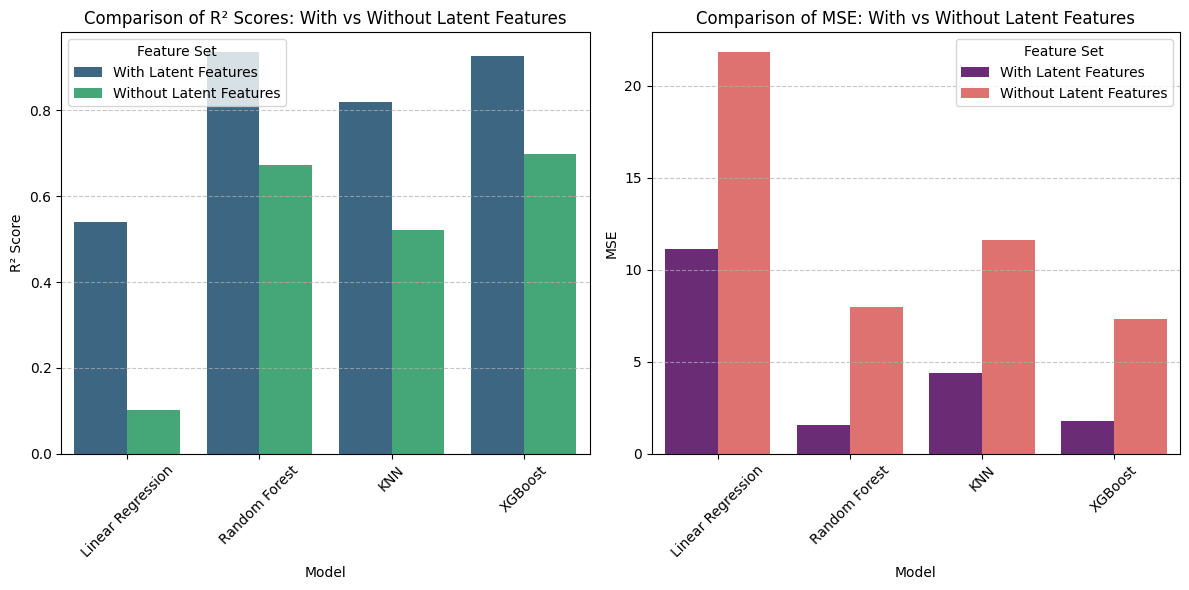

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 6))

# Plot R² Score Comparison
plt.subplot(1, 2, 1)
sns.barplot(data=model_comparison, x="Model", y="R² Score", hue="Type", palette="viridis")
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.title("Comparison of R² Scores: With vs Without Latent Features")
plt.legend(title="Feature Set")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Plot MSE Comparison
plt.subplot(1, 2, 2)
sns.barplot(data=model_comparison, x="Model", y="MSE", hue="Type", palette="magma")
plt.xlabel("Model")
plt.ylabel("MSE")
plt.title("Comparison of MSE: With vs Without Latent Features")
plt.legend(title="Feature Set")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

# Classification

In [ ]:
import pandas as pd

# Load the dataset
file_path = "/content/combined (2).csv"
df = pd.read_csv(file_path)

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())

# Show the first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10988 entries, 0 to 10987
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         10988 non-null  object 
 1   county       10988 non-null  object 
 2   maxtempF     10988 non-null  float64
 3   mintempF     10988 non-null  float64
 4   avgtempF     10988 non-null  float64
 5   totalSnow    10988 non-null  float64
 6   humid        10988 non-null  float64
 7   wind         10988 non-null  float64
 8   precip       10988 non-null  float64
 9   q_avgtempF   10988 non-null  float64
 10  q_avghumid   10988 non-null  float64
 11  q_sumprecip  10988 non-null  float64
 12  sunHour      10988 non-null  float64
 13  FIRE_NAME    10988 non-null  object 
 14  CAUSE        10988 non-null  float64
 15  lat          10988 non-null  float64
 16  long         10988 non-null  float64
 17  GIS_ACRES    10988 non-null  float64
dtypes: float64(15), object(3)
memory

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert FIRE_NAME to binary classification target
df_classification = df_selected.drop(columns=['tsne_1', 'tsne_2'], errors="ignore").copy()
df_classification['fire_occurred'] = (df['FIRE_NAME'] != 'no_fire').astype(int)


# Define features and target
X = df_classification.drop(columns=['CAUSE', 'fire_occurred'])
y = df_classification['fire_occurred']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Class distribution in training set:\n", y_train.value_counts(normalize=True))

print(df_classification)

Class distribution in training set:
 fire_occurred
0    0.639477
1    0.360523
Name: proportion, dtype: float64
        GIS_ACRES    lat    long   mintempF  CAUSE  fire_occurred
0        0.000000  34.54 -120.04  59.709677    0.0              0
1      176.763400  38.18 -120.56  51.290323    1.0              1
2       73.444778  38.18 -120.56  51.290323   10.0              1
3      101.074150  38.18 -120.56  51.290323   14.0              1
4      103.968050  38.18 -120.56  51.290323    6.0              1
...           ...    ...     ...        ...    ...            ...
10983    0.000000  37.41 -122.37  48.354839    0.0              0
10984    0.000000  41.59 -122.53  22.225806    0.0              0
10985    0.000000  37.01 -122.01  49.741935    0.0              0
10986    0.000000  39.60 -122.40  42.161290    0.0              0
10987   22.709410  35.39 -120.45  43.193548   14.0              1

[10988 rows x 6 columns]


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1406
           1       1.00      0.92      0.96       792

    accuracy                           0.97      2198
   macro avg       0.98      0.96      0.97      2198
weighted avg       0.97      0.97      0.97      2198

AUC-ROC Score: 0.9886327715275084
Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00       792

    accuracy                           1.00      2198
   macro avg       1.00      1.00      1.00      2198
weighted avg       1.00      1.00      1.00      2198

AUC-ROC Score: 0.999612950270845
KNN Results:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1406
           1       0.98      0.96      0.97       792

    accuracy                           0.98      2

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8231 - loss: 1.5061 - val_accuracy: 0.9431 - val_loss: 0.1790
Epoch 2/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9404 - loss: 0.1798 - val_accuracy: 0.9472 - val_loss: 0.1754
Epoch 3/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9456 - loss: 0.1793 - val_accuracy: 0.9572 - val_loss: 0.1503
Epoch 4/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9521 - loss: 0.1530 - val_accuracy: 0.9682 - val_loss: 0.1741
Epoch 5/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9549 - loss: 0.1639 - val_accuracy: 0.9727 - val_loss: 0.1729
Epoch 6/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9564 - loss: 0.1538 - val_accuracy: 0.9595 - val_loss: 0.1901
Epoch 7/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9666 - loss: 0.1306 - val_accuracy: 0.9691 - val_loss: 0.1315
Epoch 8/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9626 - loss: 0.1467 - val_accuracy: 0.9741 - val_

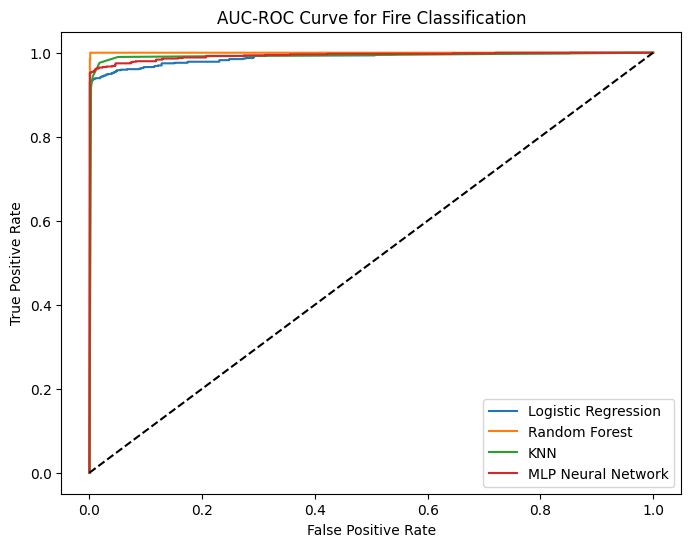

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Train Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_lr))


from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_rf))


from sklearn.neighbors import KNeighborsClassifier

# Train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

print("KNN Results:")
print(classification_report(y_test, y_pred_knn))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_knn))



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define MLP model
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile model
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Predict and evaluate
y_prob_mlp = mlp_model.predict(X_test).flatten()
y_pred_mlp = (y_prob_mlp > 0.5).astype(int)

print("MLP Neural Network Results:")
print(classification_report(y_test, y_pred_mlp))
print("AUC-ROC Score:", roc_auc_score(y_test, y_prob_mlp))


from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot(fpr_mlp, tpr_mlp, label="MLP Neural Network")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Fire Classification")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Store classification results in a DataFrame
classification_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "KNN", "MLP Neural Network"],
    "Accuracy": [
        lr_model.score(X_test, y_test),
        rf_model.score(X_test, y_test),
        knn_model.score(X_test, y_test),
        mlp_model.evaluate(X_test, y_test, verbose=0)[1]
    ],
    "Precision": [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_mlp, output_dict=True)['1']['precision'],
    ],
    "Recall": [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_mlp, output_dict=True)['1']['recall'],
    ],
    "F1-score": [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_mlp, output_dict=True)['1']['f1-score'],
    ],
    "AUC-ROC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_knn),
        roc_auc_score(y_test, y_prob_mlp),
    ]
})
# Transpose the DataFrame to have models as columns and metrics as rows
classification_results_transposed_without_latent = classification_results.set_index("Model").T

# Display the transposed DataFrame
from IPython.display import display
display(classification_results_transposed_without_latent)

Model,Logistic Regression,Random Forest,KNN,MLP Neural Network
Accuracy,0.969063,0.999090,0.977707,0.977252
Precision,0.998623,0.997481,0.979355,0.998656
Recall,0.915404,1.000000,0.958333,0.938131
F1-score,0.955204,0.998739,0.968730,0.967448
AUC-ROC,0.988633,0.999613,0.992420,0.993220


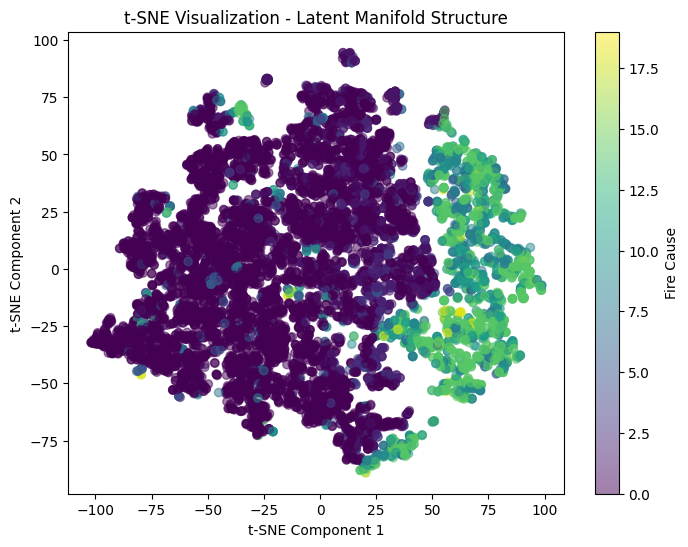

In [ ]:
from sklearn.manifold import TSNE

# Applying t-SNE to reduce dimensions to 2
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)

# Scatter plot of t-SNE transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5, c=df['CAUSE'], cmap='viridis')
plt.colorbar(label='Fire Cause')
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization - Latent Manifold Structure")
plt.show()

In [ ]:
# Adding t-SNE features to the original dataset
df['tsne_1'] = X_tsne[:, 0]
df['tsne_2'] = X_tsne[:, 1]

# Display updated dataset with t-SNE features
print(df[['tsne_1', 'tsne_2']].head())

      tsne_1     tsne_2
0  28.347691   0.327810
1  20.500996  65.554420
2  82.152344  34.870190
3  81.157898  34.380566
4  82.597061  35.054005


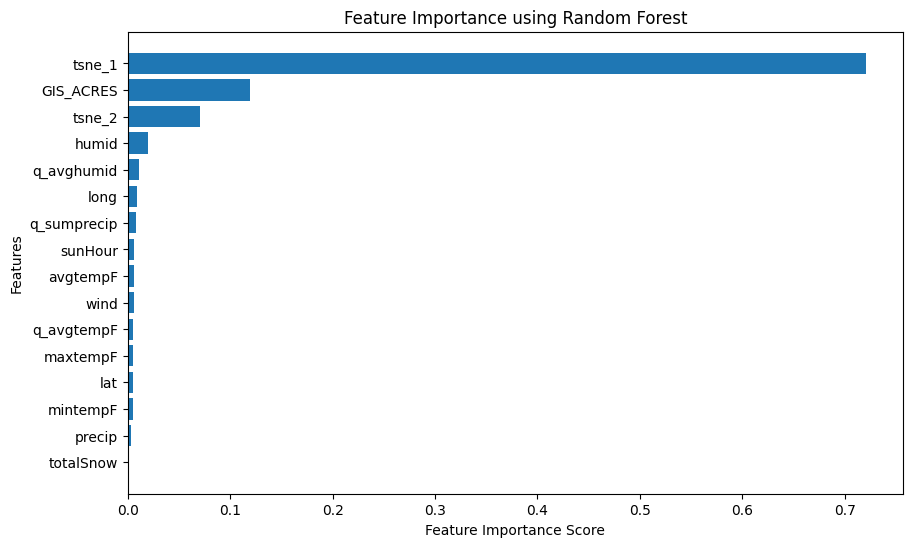

        Feature  Importance
14       tsne_1    0.720584
13    GIS_ACRES    0.119006
15       tsne_2    0.070185
4         humid    0.020115
8    q_avghumid    0.010765
12         long    0.009480
9   q_sumprecip    0.007650
10      sunHour    0.006122
2      avgtempF    0.006091
5          wind    0.005739


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Define features (excluding categorical and target variables)
feature_cols = [col for col in df.columns if col not in ['date', 'county', 'FIRE_NAME', 'CAUSE']]
X = df[feature_cols]
y = df['CAUSE']  # Target variable (fire cause)

# Train a Random Forest model to assess feature importance
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get feature importances
feature_importances_upd = pd.DataFrame({'Feature': feature_cols, 'Importance': rf_model.feature_importances_})
feature_importances_upd = feature_importances_upd.sort_values(by='Importance', ascending=False)

# Display feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_upd['Feature'], feature_importances_upd['Importance'])
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance using Random Forest")
plt.gca().invert_yaxis()
plt.show()

# Print top features
print(feature_importances_upd.head(10))

In [ ]:
# Selecting important features based on Random Forest ranking
important_features_latent = feature_importances_upd[feature_importances_upd['Importance'] > 0.010]['Feature'].tolist()
df_selected_latent = df[important_features_latent + ['CAUSE']]  # Keeping target variable

# Display updated dataset with selected features
print("Selected Features for Modeling:", important_features_latent)
print("\nUpdated Dataset Shape:", df_selected_latent.shape)

Selected Features for Modeling: ['tsne_1', 'GIS_ACRES', 'tsne_2', 'humid', 'q_avghumid']

Updated Dataset Shape: (10988, 6)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convert FIRE_NAME to binary classification target
df_classification = df_selected_latent.copy()
df_classification['fire_occurred'] = (df['FIRE_NAME'] != 'no_fire').astype(int)


# Define features and target
X = df_classification.drop(columns=['CAUSE', 'fire_occurred'])
y = df_classification['fire_occurred']

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Class distribution in training set:\n", y_train.value_counts(normalize=True))

print(df_classification)

Class distribution in training set:
 fire_occurred
0    0.639477
1    0.360523
Name: proportion, dtype: float64
          tsne_1   GIS_ACRES     tsne_2      humid  q_avghumid  CAUSE  \
0      28.347691    0.000000   0.327810  41.451613   34.079570    0.0   
1      20.500996  176.763400  65.554420  33.580645   38.434409    1.0   
2      82.152344   73.444778  34.870190  33.580645   38.434409   10.0   
3      81.157898  101.074150  34.380566  33.580645   38.434409   14.0   
4      82.597061  103.968050  35.054005  33.580645   38.434409    6.0   
...          ...         ...        ...        ...         ...    ...   
10983 -51.542168    0.000000  30.740126  71.258065   50.187814    0.0   
10984 -70.601418    0.000000  -3.380518  72.516129   46.654480    0.0   
10985 -45.083233    0.000000   5.096341  61.935484   44.815771    0.0   
10986 -40.280869    0.000000  -4.171154  54.258065   45.055197    0.0   
10987  61.385494   22.709410 -22.523392  55.838710   49.712545   14.0   

       fire

In [ ]:
# Import all necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Random Forest Classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest Results:")
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_f1 = f1_score(y_test, y_pred_rf)
rf_auc_roc = roc_auc_score(y_test, y_prob_rf)

print(f"Accuracy: {rf_accuracy:.4f}")
print(f"Precision: {rf_precision:.4f}")
print(f"Recall: {rf_recall:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print(f"AUC-ROC Score: {rf_auc_roc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("-" * 50)

# 2. K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

print("K-Nearest Neighbors Results:")
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_auc_roc = roc_auc_score(y_test, y_prob_knn)

print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision: {knn_precision:.4f}")
print(f"Recall: {knn_recall:.4f}")
print(f"F1-Score: {knn_f1:.4f}")
print(f"AUC-ROC Score: {knn_auc_roc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_knn))
print("-" * 50)

# 3. MLP Neural Network
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

y_prob_mlp = mlp_model.predict(X_test).flatten()
y_pred_mlp = (y_prob_mlp > 0.5).astype(int)

print("MLP Neural Network Results:")
mlp_accuracy = accuracy_score(y_test, y_pred_mlp)
mlp_precision = precision_score(y_test, y_pred_mlp)
mlp_recall = recall_score(y_test, y_pred_mlp)
mlp_f1 = f1_score(y_test, y_pred_mlp)
mlp_auc_roc = roc_auc_score(y_test, y_prob_mlp)

print(f"Accuracy: {mlp_accuracy:.4f}")
print(f"Precision: {mlp_precision:.4f}")
print(f"Recall: {mlp_recall:.4f}")
print(f"F1-Score: {mlp_f1:.4f}")
print(f"AUC-ROC Score: {mlp_auc_roc:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred_mlp))

Random Forest Results:
Accuracy: 0.9991
Precision: 0.9975
Recall: 1.0000
F1-Score: 0.9987
AUC-ROC Score: 0.9996

Detailed Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1406
           1       1.00      1.00      1.00       792

    accuracy                           1.00      2198
   macro avg       1.00      1.00      1.00      2198
weighted avg       1.00      1.00      1.00      2198

--------------------------------------------------
K-Nearest Neighbors Results:
Accuracy: 0.9691
Precision: 0.9814
Recall: 0.9318
F1-Score: 0.9560
AUC-ROC Score: 0.9822

Detailed Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1406
           1       0.98      0.93      0.96       792

    accuracy                           0.97      2198
   macro avg       0.97      0.96      0.97      2198
weighted avg       0.97      0.97      0.97      2198


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


275/275 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8573 - loss: 5.9729 - val_accuracy: 0.9586 - val_loss: 0.1443
Epoch 2/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9609 - loss: 0.1276 - val_accuracy: 0.9650 - val_loss: 0.1336
Epoch 3/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9703 - loss: 0.0998 - val_accuracy: 0.9691 - val_loss: 0.1093
Epoch 4/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9671 - loss: 0.1042 - val_accuracy: 0.9704 - val_loss: 0.1062
Epoch 5/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9748 - loss: 0.0863 - val_accuracy: 0.9750 - val_loss: 0.0949
Epoch 6/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9738 - loss: 0.0880 - val_accuracy: 0.9722 - val_loss: 0.1046
Epoch 7/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9738 - loss: 0.0874 - val_accuracy: 0.9650 - val_loss: 0.0988
Epoch 8/20
275/275 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9760 - loss: 0.0814 - val_accuracy: 0.9745 - val

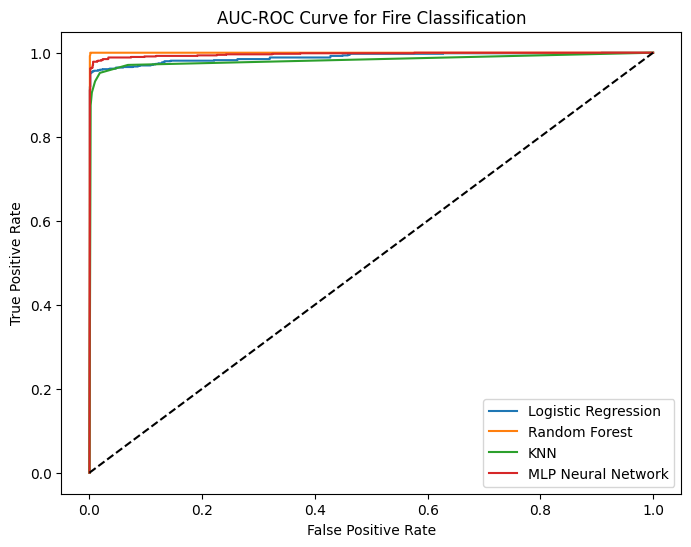

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_prob_knn)
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label="Logistic Regression")
plt.plot(fpr_rf, tpr_rf, label="Random Forest")
plt.plot(fpr_knn, tpr_knn, label="KNN")
plt.plot(fpr_mlp, tpr_mlp, label="MLP Neural Network")
plt.plot([0, 1], [0, 1], linestyle="--", color="black")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC-ROC Curve for Fire Classification")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Store classification results in a DataFrame
classification_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "KNN", "MLP Neural Network"],
    "Accuracy": [
        lr_model.score(X_test, y_test),
        rf_model.score(X_test, y_test),
        knn_model.score(X_test, y_test),
        mlp_model.evaluate(X_test, y_test, verbose=0)[1]
    ],
    "Precision": [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['precision'],
        classification_report(y_test, y_pred_mlp, output_dict=True)['1']['precision'],
    ],
    "Recall": [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['recall'],
        classification_report(y_test, y_pred_mlp, output_dict=True)['1']['recall'],
    ],
    "F1-score": [
        classification_report(y_test, y_pred_lr, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_rf, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_knn, output_dict=True)['1']['f1-score'],
        classification_report(y_test, y_pred_mlp, output_dict=True)['1']['f1-score'],
    ],
    "AUC-ROC": [
        roc_auc_score(y_test, y_prob_lr),
        roc_auc_score(y_test, y_prob_rf),
        roc_auc_score(y_test, y_prob_knn),
        roc_auc_score(y_test, y_prob_mlp),
    ]
})
# Transpose the DataFrame to have models as columns and metrics as rows
classification_results_transposed_with_latent = classification_results.set_index("Model").T

print(classification_results_transposed_with_latent)

# Display the transposed DataFrame
from IPython.display import display
display(classification_results_transposed_with_latent)
display(classification_results_transposed_without_latent)

Model      Logistic Regression  Random Forest       KNN  MLP Neural Network
Accuracy              0.977707       0.999090  0.969063            0.984531
Precision             0.997323       0.997481  0.981383            0.997375
Recall                0.940657       1.000000  0.931818            0.959596
F1-score              0.968161       0.998739  0.955959            0.978121
AUC-ROC               0.989437       0.999597  0.982160            0.996343


Model,Logistic Regression,Random Forest,KNN,MLP Neural Network
Accuracy,0.977707,0.999090,0.969063,0.984531
Precision,0.997323,0.997481,0.981383,0.997375
Recall,0.940657,1.000000,0.931818,0.959596
F1-score,0.968161,0.998739,0.955959,0.978121
AUC-ROC,0.989437,0.999597,0.982160,0.996343


Model,Logistic Regression,Random Forest,KNN,MLP Neural Network
Accuracy,0.969063,0.999090,0.977707,0.977252
Precision,0.998623,0.997481,0.979355,0.998656
Recall,0.915404,1.000000,0.958333,0.938131
F1-score,0.955204,0.998739,0.968730,0.967448
AUC-ROC,0.988633,0.999613,0.992420,0.993220


In [ ]:
import pandas as pd
from IPython.display import display

# Extract models (which are the columns)
models = classification_results_transposed_with_latent.columns.tolist()

# Extract metrics (which are the index)
metrics = classification_results_transposed_with_latent.index.tolist()

# Create a DataFrame for results with latent variables
data_with_latent = {
    "Model": models,
    "Accuracy": classification_results_transposed_with_latent.loc['Accuracy'].values,
    "Precision": classification_results_transposed_with_latent.loc['Precision'].values,
    "Recall": classification_results_transposed_with_latent.loc['Recall'].values,
    "F1-Score": classification_results_transposed_with_latent.loc['F1-score'].values,  # Dynamically find F1 metric
    "AUC-ROC": classification_results_transposed_with_latent.loc['AUC-ROC'].values
}
model_results_with_latent = pd.DataFrame(data_with_latent)

# Create a DataFrame for results without latent variables
data_without_latent = {
    "Model": models,
    "Accuracy": classification_results_transposed_without_latent.loc['Accuracy'].values,
    "Precision": classification_results_transposed_without_latent.loc['Precision'].values,
    "Recall": classification_results_transposed_without_latent.loc['Recall'].values,
    "F1-Score": classification_results_transposed_without_latent.loc['F1-score'].values,  # Dynamically find F1 metric
    "AUC-ROC": classification_results_transposed_without_latent.loc['AUC-ROC'].values
}
model_results_without_latent = pd.DataFrame(data_without_latent)

# Combine both DataFrames for comparison, adding a 'Type' column to distinguish
model_comparison = pd.concat([
    model_results_with_latent.assign(Type="With Latent Features"),
    model_results_without_latent.assign(Type="Without Latent Features")
])

# Reset index for better visualization
model_comparison.reset_index(drop=True, inplace=True)

# Display the combined DataFrame for comparison
display(model_comparison)

,Model,Accuracy,Precision,Recall,F1-Score,AUC-ROC,Type
0,Logistic Regression,0.977707,0.997323,0.940657,0.968161,0.989437,With Latent Features
1,Random Forest,0.999090,0.997481,1.000000,0.998739,0.999597,With Latent Features
2,KNN,0.969063,0.981383,0.931818,0.955959,0.982160,With Latent Features
3,MLP Neural Network,0.984531,0.997375,0.959596,0.978121,0.996343,With Latent Features
4,Logistic Regression,0.969063,0.998623,0.915404,0.955204,0.988633,Without Latent Features
5,Random Forest,0.999090,0.997481,1.000000,0.998739,0.999613,Without Latent Features
6,KNN,0.977707,0.979355,0.958333,0.968730,0.992420,Without Latent Features
7,MLP Neural Network,0.977252,0.998656,0.938131,0.967448,0.993220,Without Latent Features


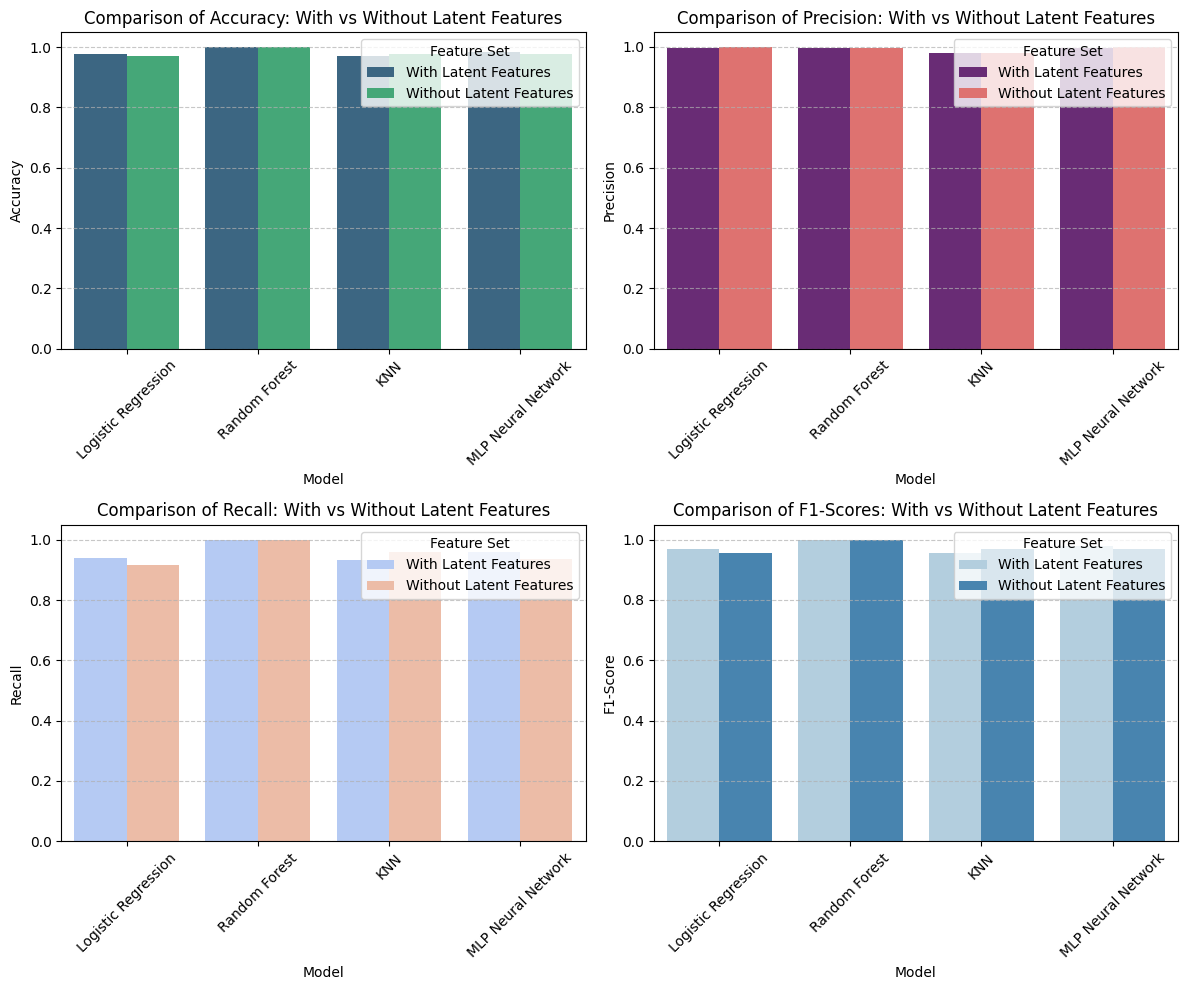

In [ ]:
# Install seaborn (if not installed)
!pip install seaborn --quiet

# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (Replace with your actual DataFrame)
# If you have 'model_comparison' stored in a CSV file, load it like this:
# model_comparison = pd.read_csv("model_comparison.csv")

# Set figure size
plt.figure(figsize=(12, 10))

# Plot Accuracy Comparison
plt.subplot(2, 2, 1)
sns.barplot(data=model_comparison, x="Model", y="Accuracy", hue="Type", palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Accuracy: With vs Without Latent Features")
plt.legend(title="Feature Set")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Plot Precision Comparison
plt.subplot(2, 2, 2)
sns.barplot(data=model_comparison, x="Model", y="Precision", hue="Type", palette="magma")
plt.xlabel("Model")
plt.ylabel("Precision")
plt.title("Comparison of Precision: With vs Without Latent Features")
plt.legend(title="Feature Set")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Plot Recall Comparison
plt.subplot(2, 2, 3)
sns.barplot(data=model_comparison, x="Model", y="Recall", hue="Type", palette="coolwarm")
plt.xlabel("Model")
plt.ylabel("Recall")
plt.title("Comparison of Recall: With vs Without Latent Features")
plt.legend(title="Feature Set")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Plot F1-Score Comparison
plt.subplot(2, 2, 4)
sns.barplot(data=model_comparison, x="Model", y="F1-Score", hue="Type", palette="Blues")
plt.xlabel("Model")
plt.ylabel("F1-Score")
plt.title("Comparison of F1-Scores: With vs Without Latent Features")
plt.legend(title="Feature Set")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adjust layout and show plot
plt.tight_layout()
plt.show()